In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/'My Drive'/'Colab Notebooks'/
!pwd

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import requests
import json
import csv
import logging
import time
from tqdm import *
import matplotlib.pyplot as plt
import numpy as np
import re
!pip install googletrans

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 1.3 MB 15.3 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
     |████████████████████████████████| 65 kB 4.6 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=40d76333847e36fe360cd01b7d2a07ab37674a4915e86fdc604a8a9f371e9119
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
rent = pd.read_csv('rent.csv', encoding='utf-8', sep=',', header='infer')
rent.columns = ['link', 'title', 'address', 'property_type', 'bedrooms', 
  'bathrooms', 'residents', 'with_furniture', 'rental_price', 'rental_method', 'start_date', 
  'rental_period', 'facilities', 'surroundings', 'geo_location'] 

In [ ]:
rent.head(20)

,link,title,address,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,facilities,surroundings,geo_location
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,"639 Little Lonsdale Street, Melbourne VIC, Au...",公寓,1,1,2,不包含,350,整套房子,2021-05-13,租期不限,"空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","639 Little Lonsdale Street, Melbourne VIC, Aus..."
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,"Palm Street, Thomastown Victoria 3074, Australia",别墅,3,2,6,包含,390,整套房子,2021-04-26,租期不限,"洗衣机,冰箱,空调,厨房,阳台","<p id=""searchview_per2"" class=""searchview_per2...","Palm Street, Thomastown Victoria 3074, Austral..."
2,https://www.awehome.com/au/melborune/detail-ap...,Monash大学近Caulfield校区学生公寓studio,"1023 Dandenong Road Service Road, Malvern Eas...",公寓,1,1,1,包含,300,整套房子,随时,半年,"洗衣机,冰箱,电视,空调,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","1023 Dandenong Road Service Road, Malvern East..."
3,https://www.awehome.com/au/melborune/detail-ap...,"墨尔本 二房一厅 明房出租 包家具,家电",488 Swanston St Carlton VIC 3053,公寓,2,1,2,包含,585,整套房子,随时,一年及以上,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","488 Swanston St Carlton VIC 3053, 墨尔本大学：\r\n步行..."
4,https://www.awehome.com/au/melborune/detail-ap...,Docklands豪华的全景房 两房两卫 公寓 带家具和车位,"889 Collins Street, Docklands Victoria 3008, ...",公寓,2,2,1,包含,630,整套房子,随时,半年,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","889 Collins Street, Docklands Victoria 3008, A..."
5,https://www.awehome.com/au/melborune/detail-ap...,唐人街处近墨大和RMIT两房两卫高层公寓出租,"199 William Street, Melbourne Victoria 3000, ...",公寓,2,2,3,包含,600,整套房子,随时,半年,"洗衣机,冰箱,空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","199 William Street, Melbourne Victoria 3000, A..."
6,https://www.awehome.com/au/melborune/detail-ap...,Carnegie 好房出租 大空间主卧 独立卫浴,"44b Belsize Avenue, Carnegie Victoria 3163, A...",别墅,5,2,5,包含,220,独立房间1,随时,租期不限,"洗衣机,冰箱,电视,空调,WIFI,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站...","<p id=""searchview_per1"" class=""searchview_per1...","44b Belsize Avenue, Carnegie Victoria 3163, Au..."
7,https://www.awehome.com/au/melborune/detail-ap...,近墨尔本大学两房一卫优质公寓包家具,"A'beckett Street, St Kilda East Victoria 3183...",公寓,2,1,2,包含,410,整套房子,随时,租期不限,"洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房...","<p id=""searchview_per1"" class=""searchview_per1...","A'beckett Street, St Kilda East Victoria 3183,..."
8,https://www.awehome.com/au/melborune/detail-ap...,近墨大 河景宽敞 两房一卫公寓 随时入住,"20 Shamrock Street, Abbotsford Victoria 3067,...",公寓,2,1,3,不包含,490,整套房子,随时,租期不限,"空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","20 Shamrock Street, Abbotsford Victoria 3067, ..."
9,https://www.awehome.com/au/melborune/detail-ap...,海港旁 两室一卫，设备齐全的观景公寓,"883 Collins Street, Docklands Victoria 3008, ...",公寓,2,1,3,包含,580,整套房子,随时,半年,"空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","883 Collins Street, Docklands Victoria 3008, A..."


In [ ]:
rent.duplicated().sum()
rent = rent.drop_duplicates()

In [ ]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 1686
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   link            1687 non-null   object
 1   title           1687 non-null   object
 2   address         1687 non-null   object
 3   property_type   1687 non-null   object
 4   bedrooms        1687 non-null   int64 
 5   bathrooms       1687 non-null   int64 
 6   residents       1687 non-null   int64 
 7   with_furniture  1687 non-null   object
 8   rental_price    1687 non-null   int64 
 9   rental_method   1687 non-null   object
 10  start_date      1687 non-null   object
 11  rental_period   1660 non-null   object
 12  facilities      1685 non-null   object
 13  surroundings    1687 non-null   object
 14  geo_location    1687 non-null   object
dtypes: int64(4), object(11)
memory usage: 210.9+ KB


In [ ]:
rent.head(100)

,link,title,address,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,facilities,surroundings,geo_location
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,"639 Little Lonsdale Street, Melbourne VIC, Au...",公寓,1,1,2,不包含,350,整套房子,2021-05-13,租期不限,"空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","639 Little Lonsdale Street, Melbourne VIC, Aus..."
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,"Palm Street, Thomastown Victoria 3074, Australia",别墅,3,2,6,包含,390,整套房子,2021-04-26,租期不限,"洗衣机,冰箱,空调,厨房,阳台","<p id=""searchview_per2"" class=""searchview_per2...","Palm Street, Thomastown Victoria 3074, Austral..."
2,https://www.awehome.com/au/melborune/detail-ap...,Monash大学近Caulfield校区学生公寓studio,"1023 Dandenong Road Service Road, Malvern Eas...",公寓,1,1,1,包含,300,整套房子,随时,半年,"洗衣机,冰箱,电视,空调,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","1023 Dandenong Road Service Road, Malvern East..."
3,https://www.awehome.com/au/melborune/detail-ap...,"墨尔本 二房一厅 明房出租 包家具,家电",488 Swanston St Carlton VIC 3053,公寓,2,1,2,包含,585,整套房子,随时,一年及以上,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","488 Swanston St Carlton VIC 3053, 墨尔本大学：\r\n步行..."
4,https://www.awehome.com/au/melborune/detail-ap...,Docklands豪华的全景房 两房两卫 公寓 带家具和车位,"889 Collins Street, Docklands Victoria 3008, ...",公寓,2,2,1,包含,630,整套房子,随时,半年,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","889 Collins Street, Docklands Victoria 3008, A..."
5,https://www.awehome.com/au/melborune/detail-ap...,唐人街处近墨大和RMIT两房两卫高层公寓出租,"199 William Street, Melbourne Victoria 3000, ...",公寓,2,2,3,包含,600,整套房子,随时,半年,"洗衣机,冰箱,空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","199 William Street, Melbourne Victoria 3000, A..."
6,https://www.awehome.com/au/melborune/detail-ap...,Carnegie 好房出租 大空间主卧 独立卫浴,"44b Belsize Avenue, Carnegie Victoria 3163, A...",别墅,5,2,5,包含,220,独立房间1,随时,租期不限,"洗衣机,冰箱,电视,空调,WIFI,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站...","<p id=""searchview_per1"" class=""searchview_per1...","44b Belsize Avenue, Carnegie Victoria 3163, Au..."
7,https://www.awehome.com/au/melborune/detail-ap...,近墨尔本大学两房一卫优质公寓包家具,"A'beckett Street, St Kilda East Victoria 3183...",公寓,2,1,2,包含,410,整套房子,随时,租期不限,"洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房...","<p id=""searchview_per1"" class=""searchview_per1...","A'beckett Street, St Kilda East Victoria 3183,..."
8,https://www.awehome.com/au/melborune/detail-ap...,近墨大 河景宽敞 两房一卫公寓 随时入住,"20 Shamrock Street, Abbotsford Victoria 3067,...",公寓,2,1,3,不包含,490,整套房子,随时,租期不限,"空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","20 Shamrock Street, Abbotsford Victoria 3067, ..."
9,https://www.awehome.com/au/melborune/detail-ap...,海港旁 两室一卫，设备齐全的观景公寓,"883 Collins Street, Docklands Victoria 3008, ...",公寓,2,1,3,包含,580,整套房子,随时,半年,"空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","883 Collins Street, Docklands Victoria 3008, A..."


In [ ]:
rent.reset_index(drop=True, inplace=True)

In [ ]:
null_columns=rent.columns[rent.isnull().any()]

In [ ]:
rent[null_columns].isnull().sum()

rental_period    27
facilities        2
dtype: int64

In [ ]:
print(rent[rent.isnull().any(axis=1)][null_columns])

     rental_period                                         facilities
36             NaN                  洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,公交站,超市
45             NaN  洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,包bill,超市,公园,餐馆,近city,游...
48             NaN  洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,包bill,超市,公园,餐馆,近cit...
49             NaN  洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,超市,餐馆,近city,游泳池,健身房,火车...
61             NaN  洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,测试,超市,餐馆,近city,游泳池,...
63             NaN  洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,包bill,超市,公园,餐馆,近city,游...
64             NaN                  洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,公交站,超市
87             NaN  洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,包bill,超市,公园,餐馆,近cit...
99             NaN           洗衣机,冰箱,WIFI,厨房,阳台,超市,公园,餐馆,近city,火车站,公交站
103            NaN  洗衣机,冰箱,空调,厨房,电梯,WIFI,超市,公园,餐馆,近city,游泳池,健身房,公交...
127            NaN                  包bill,洗衣机,冰箱,WIFI,厨房,公园,超市,餐馆,火车站
166            NaN  洗衣机,冰箱,电视,厨房,空调,电梯,WIFI,阳台,超市,公园,餐馆,近city,游泳池,...
171            NaN  洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房...
198            NaN  

In [ ]:
rent['address'] 

0        639 Little Lonsdale Street, Melbourne VIC, Au...
1        Palm Street, Thomastown Victoria 3074, Australia
2        1023 Dandenong Road Service Road, Malvern Eas...
3                        488 Swanston St Carlton VIC 3053
4        889 Collins Street, Docklands Victoria 3008, ...
5        199 William Street, Melbourne Victoria 3000, ...
6        44b Belsize Avenue, Carnegie Victoria 3163, A...
7        A'beckett Street, St Kilda East Victoria 3183...
8        20 Shamrock Street, Abbotsford Victoria 3067,...
9        883 Collins Street, Docklands Victoria 3008, ...
10       300 Swanston Street, Melbourne Victoria 3000,...
11       392 Spencer Street, West Melbourne Victoria 3...
12       393 Spencer Street, West Melbourne VIC, Austr...
13                    Station St Caulfield North VIC 3161
14       圣帕特里克大教堂 (St Patrick's Cathedral) Cathedral P...
15       639 Lonsdale Street, Melbourne Victoria 3000,...
16       A'beckett Street, St Kilda East Victoria 3183...
17       60 Do

In [ ]:
logger = logging.getLogger("root")
logger.setLevel(logging.DEBUG)
# create console handler
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
logger.addHandler(ch)

In [ ]:
API_KEY = ""
# Backoff time sets how many minutes to wait between google pings when API limit is hit
BACKOFF_TIME = 30
# Set output file name here.
output_filename = 'transformed_address.csv'
# Setinput file here
input_filename = "rent.csv"
# Specify the column name in input data that contains addresses here
address_column_name = "address"
# Return Full Google Results? If True, full JSON results from Google are included in output
RETURN_FULL_RESULTS = False

In [ ]:
# Form a list of addresses for geocoding:
# Make a big list of all of the addresses to be processed.
addresses = rent[address_column_name].tolist()

In [ ]:
def get_google_results(address, api_key=None, return_full_response=False):
    # Set up Geocoding url
    geocode_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}".format(address)
    if api_key is not None:
        geocode_url = geocode_url + "&key={}".format(api_key)
        
    # Ping google for the reuslts:
    results = requests.get(geocode_url)
    # Results will be in JSON format - convert to dict using requests functionality
    results = results.json()

    # if there's no results or an error, return empty results.
    if len(results['results']) == 0:
        output = {
            "formatted_address" : None,
            "latitude": None,
            "longitude": None,
            "accuracy": None,
            "google_place_id": None,
            "type": None,
            "postcode": None
        }
    else:    
        answer = results['results'][0]
        output = {
            "formatted_address" : answer.get('formatted_address'),
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng'),
            "accuracy": answer.get('geometry').get('location_type'),
            "google_place_id": answer.get("place_id"),
            "type": ",".join(answer.get('types')),
            "postcode": ",".join([x['long_name'] for x in answer.get('address_components') 
                                  if 'postal_code' in x.get('types')])
        }

   # Append some other details:    
    output['input_string'] = address
    output['number_of_results'] = len(results['results'])
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output     

In [ ]:
test_result = get_google_results("Melbourne, Australia", API_KEY, RETURN_FULL_RESULTS)

# Create a list to hold results
results = []
# Go through each address in turn
for address in addresses:
    # While the address geocoding is not finished:
    geocoded = False
    while geocoded is not True:
        # Geocode the address with google
        try:
            geocode_result = get_google_results(address, API_KEY, return_full_response=RETURN_FULL_RESULTS)
        except Exception as e:
            logger.exception(e)
            logger.error("Major error with {}".format(address))
            logger.error("Skipping!")
            geocoded = True
            
        # If we're over the API limit, backoff for a while and try again later.
        if geocode_result['status'] == 'OVER_QUERY_LIMIT':
            logger.info("Hit Query Limit! Backing off for a bit.")
            time.sleep(BACKOFF_TIME * 60) # sleep for 30 minutes
            geocoded = False
        else:
            # If we're ok with API use, save the results
            # Note that the results might be empty / non-ok - log this
            if geocode_result['status'] != 'OK':
                logger.warning("Error geocoding {}: {}".format(address, geocode_result['status']))
            logger.debug("Geocoded: {}: {}".format(address, geocode_result['status']))
            results.append(geocode_result)           
            geocoded = True

    # Print status every 100 addresses
    if len(results) % 100 == 0:
    	logger.info("Completed {} of {} address".format(len(results), len(addresses)))
            
    # Every 500 addresses, save progress to file(in case of a failure so you have something!)
    if len(results) % 500 == 0:
        pd.DataFrame(results).to_csv("{}_bak".format(output_filename))

# All done
logger.info("Finished geocoding all addresses")
# Write the full results to csv using the pandas library.
pd.DataFrame(results).to_csv(output_filename, encoding='utf8')

Error geocoding  639 Little Lonsdale Street, Melbourne VIC, Australia: REQUEST_DENIED
Geocoded:  639 Little Lonsdale Street, Melbourne VIC, Australia: REQUEST_DENIED
Error geocoding  Palm Street, Thomastown Victoria 3074, Australia: REQUEST_DENIED
Geocoded:  Palm Street, Thomastown Victoria 3074, Australia: REQUEST_DENIED
Error geocoding  1023 Dandenong Road Service Road, Malvern East Victoria 3145, Australia: REQUEST_DENIED
Geocoded:  1023 Dandenong Road Service Road, Malvern East Victoria 3145, Australia: REQUEST_DENIED
Error geocoding  488 Swanston St Carlton VIC 3053: REQUEST_DENIED
Geocoded:  488 Swanston St Carlton VIC 3053: REQUEST_DENIED
Error geocoding  889 Collins Street, Docklands Victoria 3008, Australia: REQUEST_DENIED
Geocoded:  889 Collins Street, Docklands Victoria 3008, Australia: REQUEST_DENIED
Error geocoding  199 William Street, Melbourne Victoria 3000, Australia: REQUEST_DENIED
Geocoded:  199 William Street, Melbourne Victoria 3000, Australia: REQUEST_DENIED
Error 

In [ ]:
transformed_address = pd.read_csv('transformed_address.csv', encoding='utf-8', sep=',', header='infer')
rent[['formatted_address','latitude', 'longitude', 'postcode']] = transformed_address[['formatted_address','latitude','longitude', 'postcode']]

In [ ]:
rent=rent.drop('address', 1)

In [ ]:
rent.head(2)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,facilities,surroundings,geo_location,formatted_address,latitude,longitude,postcode
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,公寓,1,1,2,不包含,350,整套房子,2021-05-13,租期不限,"空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","639 Little Lonsdale Street, Melbourne VIC, Aus...",NaN,NaN,NaN,NaN
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,别墅,3,2,6,包含,390,整套房子,2021-04-26,租期不限,"洗衣机,冰箱,空调,厨房,阳台","<p id=""searchview_per2"" class=""searchview_per2...","Palm Street, Thomastown Victoria 3074, Austral...",NaN,NaN,NaN,NaN


In [ ]:
rent['property_type'].value_counts()

公寓    1465
别墅     202
其他      20
Name: property_type, dtype: int64

In [ ]:
rent.loc[(rent.property_type == '公寓'), 'property_type']='apartment'
rent['property_type'] = np.where((rent.property_type == '别墅'),'house',rent.property_type)
rent['property_type'].mask(rent['property_type'] == '其他', 'others', inplace=True)
rent.head(5)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,facilities,surroundings,geo_location,formatted_address,latitude,longitude,postcode
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,apartment,1,1,2,不包含,350,整套房子,2021-05-13,租期不限,"空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","639 Little Lonsdale Street, Melbourne VIC, Aus...",NaN,NaN,NaN,NaN
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,house,3,2,6,包含,390,整套房子,2021-04-26,租期不限,"洗衣机,冰箱,空调,厨房,阳台","<p id=""searchview_per2"" class=""searchview_per2...","Palm Street, Thomastown Victoria 3074, Austral...",NaN,NaN,NaN,NaN
2,https://www.awehome.com/au/melborune/detail-ap...,Monash大学近Caulfield校区学生公寓studio,apartment,1,1,1,包含,300,整套房子,随时,半年,"洗衣机,冰箱,电视,空调,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","1023 Dandenong Road Service Road, Malvern East...",NaN,NaN,NaN,NaN
3,https://www.awehome.com/au/melborune/detail-ap...,"墨尔本 二房一厅 明房出租 包家具,家电",apartment,2,1,2,包含,585,整套房子,随时,一年及以上,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","488 Swanston St Carlton VIC 3053, 墨尔本大学：\r\n步行...",NaN,NaN,NaN,NaN
4,https://www.awehome.com/au/melborune/detail-ap...,Docklands豪华的全景房 两房两卫 公寓 带家具和车位,apartment,2,2,1,包含,630,整套房子,随时,半年,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","889 Collins Street, Docklands Victoria 3008, A...",NaN,NaN,NaN,NaN


In [ ]:
rent['with_furniture'].mask(rent['with_furniture'] == '包含', '1', inplace=True)
rent['with_furniture'].mask(rent['with_furniture'] == '不包含', '0', inplace=True)
rent.head(4)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,facilities,surroundings,geo_location,formatted_address,latitude,longitude,postcode
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,apartment,1,1,2,0,350,整套房子,2021-05-13,租期不限,"空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","639 Little Lonsdale Street, Melbourne VIC, Aus...",NaN,NaN,NaN,NaN
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,house,3,2,6,1,390,整套房子,2021-04-26,租期不限,"洗衣机,冰箱,空调,厨房,阳台","<p id=""searchview_per2"" class=""searchview_per2...","Palm Street, Thomastown Victoria 3074, Austral...",NaN,NaN,NaN,NaN
2,https://www.awehome.com/au/melborune/detail-ap...,Monash大学近Caulfield校区学生公寓studio,apartment,1,1,1,1,300,整套房子,随时,半年,"洗衣机,冰箱,电视,空调,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","1023 Dandenong Road Service Road, Malvern East...",NaN,NaN,NaN,NaN
3,https://www.awehome.com/au/melborune/detail-ap...,"墨尔本 二房一厅 明房出租 包家具,家电",apartment,2,1,2,1,585,整套房子,随时,一年及以上,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","488 Swanston St Carlton VIC 3053, 墨尔本大学：\r\n步行...",NaN,NaN,NaN,NaN


In [ ]:
rent['rental_method'].value_counts()

独立房间1         709
整套房子          570
独立房间1 - 主卧    371
床位1            18
独立房间1 - 次卧     14
次卧 - 次卧         2
主卧 - 主卧         2
整租 - 主卧         1
Name: rental_method, dtype: int64

In [ ]:
rent.loc[(rent.rental_method == '整租 - 主卧'), 'rental_method']='独立房间1 - 主卧'

In [ ]:
print(rent.loc[[892]])

                                                  link       title  \
892  https://www.awehome.com/au/melborune/detail-ap...  City主卧招短租    

    property_type  bedrooms  bathrooms  residents with_furniture  \
892     apartment         2          1          2              1   

     rental_price rental_method start_date rental_period  \
892           330       主卧 - 主卧         随时            短租   

                                            facilities  \
892  洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,近city,餐馆,公园,超市,健身房,火车站...   

                                          surroundings           geo_location  \
892  <p id="searchview_per1" class="searchview_per1...  500Elizabeth street,    

     formatted_address  latitude  longitude  postcode  
892                NaN       NaN        NaN       NaN  


In [ ]:
rent.at[892, 'rental_method'] = '独立房间1 - 次卧'
print(rent.loc[[892]])

                                                  link       title  \
892  https://www.awehome.com/au/melborune/detail-ap...  City主卧招短租    

    property_type  bedrooms  bathrooms  residents with_furniture  \
892     apartment         2          1          2              1   

     rental_price rental_method start_date rental_period  \
892           330    独立房间1 - 次卧         随时            短租   

                                            facilities  \
892  洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,近city,餐馆,公园,超市,健身房,火车站...   

                                          surroundings           geo_location  \
892  <p id="searchview_per1" class="searchview_per1...  500Elizabeth street,    

     formatted_address  latitude  longitude  postcode  
892                NaN       NaN        NaN       NaN  


In [ ]:
rent.at[906, 'rental_method'] = '独立房间1 - 主卧'
print(rent.loc[[906]])

                                                  link              title  \
906  https://www.awehome.com/au/melborune/detail-ap...  近迪肯大学全新学生公寓有独立卫浴    

    property_type  bedrooms  bathrooms  residents with_furniture  \
906     apartment         8          4          8              1   

     rental_price rental_method start_date rental_period  \
906           325    独立房间1 - 主卧         随时            半年   

                                   facilities  \
906  洗衣机,冰箱,空调,WIFI,厨房,包bill,餐馆,公园,超市,火车站,公交站   

                                          surroundings  \
906  <p id="searchview_per1" class="searchview_per1...   

                                          geo_location  formatted_address  \
906  79 Elgar Road, Burwood Victoria 3125, Australi...                NaN   

     latitude  longitude  postcode  
906       NaN        NaN       NaN  


In [ ]:
rent['rental_method'].value_counts()

独立房间1         709
整套房子          570
独立房间1 - 主卧    373
床位1            18
独立房间1 - 次卧     15
次卧 - 次卧         2
Name: rental_method, dtype: int64

In [ ]:
rent.at[1035, 'rental_method'] = '独立房间1 - 次卧'
print(rent.loc[[1035]])

                                                   link             title  \
1035  https://www.awehome.com/au/melborune/detail-ap...  近墨大近City近维多利亚市场    

     property_type  bedrooms  bathrooms  residents with_furniture  \
1035        others         2          1          2              1   

      rental_price rental_method start_date rental_period  \
1035           320    独立房间1 - 次卧         随时            半年   

                          facilities  \
1035  洗衣机,冰箱,空调,WIFI,厨房,阳台,近city,公交站   

                                           surroundings  \
1035  <p id="searchview_per1" class="searchview_per1...   

                                           geo_location  formatted_address  \
1035  18 Barkly Place, Carlton Victoria 3053, Austra...                NaN   

      latitude  longitude  postcode  
1035       NaN        NaN       NaN  


In [ ]:
rent.loc[(rent.rental_method == '整套房子'), 'rental_method']='studio'
rent['rental_method'] = np.where((rent.rental_method == '独立房间1'),'seperate_room',rent.rental_method )
rent['rental_method'].mask(rent['rental_method'] == '独立房间1 - 主卧', 'master_room', inplace=True)
rent['rental_method'].mask(rent['rental_method'] == '独立房间1 - 次卧', 'secondary_room', inplace=True)
rent.loc[(rent.rental_method == '床位1'), 'rental_method']='1bed'

rent['rental_method'].value_counts()

seperate_room     709
studio            570
master_room       373
1bed               18
secondary_room     16
次卧 - 次卧             1
Name: rental_method, dtype: int64

In [ ]:
rent['start_date'] = pd.to_datetime(rent['start_date'], format='%Y-%m-%d', errors='ignore')
today = pd.to_datetime('today').strftime("%Y-%m-%d")
rent.loc[rent['start_date'] == '随时', 'start_date'] = today


In [ ]:

rent['start_date'] = pd.to_datetime(rent['start_date'])

rent['start_date'] = rent['start_date'].dt.strftime('%Y-%m-%d')


In [ ]:
rent.head(100)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,facilities,surroundings,geo_location,formatted_address,latitude,longitude,postcode
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,apartment,1,1,2,0,350,studio,2021-05-13,租期不限,"空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","639 Little Lonsdale Street, Melbourne VIC, Aus...",NaN,NaN,NaN,NaN
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,house,3,2,6,1,390,studio,2021-04-26,租期不限,"洗衣机,冰箱,空调,厨房,阳台","<p id=""searchview_per2"" class=""searchview_per2...","Palm Street, Thomastown Victoria 3074, Austral...",NaN,NaN,NaN,NaN
2,https://www.awehome.com/au/melborune/detail-ap...,Monash大学近Caulfield校区学生公寓studio,apartment,1,1,1,1,300,studio,2021-11-28,半年,"洗衣机,冰箱,电视,空调,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","1023 Dandenong Road Service Road, Malvern East...",NaN,NaN,NaN,NaN
3,https://www.awehome.com/au/melborune/detail-ap...,"墨尔本 二房一厅 明房出租 包家具,家电",apartment,2,1,2,1,585,studio,2021-11-28,一年及以上,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","488 Swanston St Carlton VIC 3053, 墨尔本大学：\r\n步行...",NaN,NaN,NaN,NaN
4,https://www.awehome.com/au/melborune/detail-ap...,Docklands豪华的全景房 两房两卫 公寓 带家具和车位,apartment,2,2,1,1,630,studio,2021-11-28,半年,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","889 Collins Street, Docklands Victoria 3008, A...",NaN,NaN,NaN,NaN
5,https://www.awehome.com/au/melborune/detail-ap...,唐人街处近墨大和RMIT两房两卫高层公寓出租,apartment,2,2,3,1,600,studio,2021-11-28,半年,"洗衣机,冰箱,空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","199 William Street, Melbourne Victoria 3000, A...",NaN,NaN,NaN,NaN
6,https://www.awehome.com/au/melborune/detail-ap...,Carnegie 好房出租 大空间主卧 独立卫浴,house,5,2,5,1,220,seperate_room,2021-11-28,租期不限,"洗衣机,冰箱,电视,空调,WIFI,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站...","<p id=""searchview_per1"" class=""searchview_per1...","44b Belsize Avenue, Carnegie Victoria 3163, Au...",NaN,NaN,NaN,NaN
7,https://www.awehome.com/au/melborune/detail-ap...,近墨尔本大学两房一卫优质公寓包家具,apartment,2,1,2,1,410,studio,2021-11-28,租期不限,"洗衣机,冰箱,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房...","<p id=""searchview_per1"" class=""searchview_per1...","A'beckett Street, St Kilda East Victoria 3183,...",NaN,NaN,NaN,NaN
8,https://www.awehome.com/au/melborune/detail-ap...,近墨大 河景宽敞 两房一卫公寓 随时入住,apartment,2,1,3,0,490,studio,2021-11-28,租期不限,"空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","20 Shamrock Street, Abbotsford Victoria 3067, ...",NaN,NaN,NaN,NaN
9,https://www.awehome.com/au/melborune/detail-ap...,海港旁 两室一卫，设备齐全的观景公寓,apartment,2,1,3,1,580,studio,2021-11-28,半年,"空调,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","883 Collins Street, Docklands Victoria 3008, A...",NaN,NaN,NaN,NaN


In [ ]:
rent.loc[(rent.rental_period == '租期不限'), 'rental_period']='unlimited'
rent['rental_period'] = np.where((rent.rental_period == '半年'),'half_year',rent.rental_period)
rent['rental_period'].mask(rent['rental_period'] == '短租', 'short term', inplace=True)
rent['rental_period'].mask(rent['rental_period'] == '一年及以上', 'oneyear_above', inplace=True)

rent['rental_period'].value_counts()

unlimited        959
half_year        326
short term       231
oneyear_above    144
Name: rental_period, dtype: int64

In [ ]:
columns = ['洗衣机','冰箱','电视','空调','WIFI','厨房','电梯','阳台','公寓周边','超市','公园','餐馆','近city','健身房','火车站','公交站','游泳池']
for item in columns:
  rent[item] = rent['facilities'].apply(
    lambda x: 1 if item in str(x) else 0)

In [ ]:
rent.head(
)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,facilities,surroundings,geo_location,formatted_address,latitude,longitude,postcode,洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,公寓周边,超市,公园,餐馆,近city,健身房,火车站,公交站,游泳池
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,apartment,1,1,2,0,350,studio,2021-05-13,unlimited,"空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","639 Little Lonsdale Street, Melbourne VIC, Aus...",NaN,NaN,NaN,NaN,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,house,3,2,6,1,390,studio,2021-04-26,unlimited,"洗衣机,冰箱,空调,厨房,阳台","<p id=""searchview_per2"" class=""searchview_per2...","Palm Street, Thomastown Victoria 3074, Austral...",NaN,NaN,NaN,NaN,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,https://www.awehome.com/au/melborune/detail-ap...,Monash大学近Caulfield校区学生公寓studio,apartment,1,1,1,1,300,studio,2021-11-28,half_year,"洗衣机,冰箱,电视,空调,厨房,阳台,超市,公园,餐馆,近city,健身房,火车站,公交站","<p id=""searchview_per1"" class=""searchview_per1...","1023 Dandenong Road Service Road, Malvern East...",NaN,NaN,NaN,NaN,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0
3,https://www.awehome.com/au/melborune/detail-ap...,"墨尔本 二房一厅 明房出租 包家具,家电",apartment,2,1,2,1,585,studio,2021-11-28,oneyear_above,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","488 Swanston St Carlton VIC 3053, 墨尔本大学：\r\n步行...",NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4,https://www.awehome.com/au/melborune/detail-ap...,Docklands豪华的全景房 两房两卫 公寓 带家具和车位,apartment,2,2,1,1,630,studio,2021-11-28,half_year,"洗衣机,冰箱,电视,空调,WIFI,厨房,电梯,阳台,超市,公园,餐馆,近city,游泳池,...","<p id=""searchview_per1"" class=""searchview_per1...","889 Collins Street, Docklands Victoria 3008, A...",NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
rent.columns = ['link','title', 'property_type', 'bedrooms', 'bathrooms','residents', 'with_furniture', 'rental_price', 'rental_method', 'start_date', 'rental_period', 'facilities', 'surroundings', 'geo_location'
, 'formatted_address', 'latitude', 'longitude', 'postcode', 'washing_machine', 'refrigerator', 'Tv', 'air_conditioner','WIFI', 'kitchen', 'elevator','balcony', 'nearby', 'supermarket', 'park', 'restaurant', 'close_city', 'gym', 'train_station', 'bus_station', 'swimming_pool']

In [ ]:
rent['nearby'].value_counts()

rent=rent.drop(['facilities', 'nearby'], 1)

In [ ]:
rent['surroundings'].unique()

array(['<p id="searchview_per1" class="searchview_per1" style="font-weight: bold">超市<span style="font-weight: normal">：下楼便是超大Coles和亚超</span><br>公园<span style="font-weight: normal">：步行5m</span><br>餐馆<span style="font-weight: normal"></span><br>近city<span style="font-weight: normal"></span><br>游泳池<span style="font-weight: normal">：免费超大泳池</span><br>健身房<span style="font-weight: normal">：免费器械全</span><br>火车站<span style="font-weight: normal">：家对面Southern Cross</span><br>公交站<span style="font-weight: normal">：家楼下</span><br></p>\r\n<p id="searchview_per2" class="searchview_per2" style="font-weight: bold">附近大学：墨尔本大学 <span style="font-weight: normal">步行15m</span><br></p>\r\n',
       '<p id="searchview_per2" class="searchview_per2" style="font-weight: bold">附近大学：拉筹伯大学 <span style="font-weight: normal"></span><br>附近大学：墨尔本大学 <span style="font-weight: normal"></span><br></p>\r\n',
       '<p id="searchview_per1" class="searchview_per1" style="font-weight: bold">超市<span style="font-weight: normal">：距c

In [ ]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
rent['surroundings']=rent['surroundings'].apply(lambda cw : remove_tags(cw))

In [ ]:
rent.head(10)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,surroundings,geo_location,formatted_address,latitude,longitude,postcode,washing_machine,refrigerator,Tv,air_conditioner,WIFI,kitchen,elevator,balcony,supermarket,park,restaurant,close_city,gym,train_station,bus_station,swimming_pool
0,https://www.awehome.com/au/melborune/detail-ap...,墨尔本高端公寓便宜转租,apartment,1,1,2,0,350,studio,2021-05-13,unlimited,超市：下楼便是超大Coles和亚超公园：步行5m餐馆近city游泳池：免费超大泳池健身房：免...,"639 Little Lonsdale Street, Melbourne VIC, Aus...",NaN,NaN,NaN,NaN,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,https://www.awehome.com/au/melborune/detail-ap...,北区近火车站三房大house整租拎包入住,house,3,2,6,1,390,studio,2021-04-26,unlimited,附近大学：拉筹伯大学 附近大学：墨尔本大学 \r\n,"Palm Street, Thomastown Victoria 3074, Austral...",NaN,NaN,NaN,NaN,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
2,https://www.awehome.com/au/melborune/detail-ap...,Monash大学近Caulfield校区学生公寓studio,apartment,1,1,1,1,300,studio,2021-11-28,half_year,超市：距coles和Woolworth10min不到，附近走路10min有亚超公园餐馆：周围...,"1023 Dandenong Road Service Road, Malvern East...",NaN,NaN,NaN,NaN,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0
3,https://www.awehome.com/au/melborune/detail-ap...,"墨尔本 二房一厅 明房出租 包家具,家电",apartment,2,1,2,1,585,studio,2021-11-28,oneyear_above,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：墨尔本大学 走路5分钟附近大...,"488 Swanston St Carlton VIC 3053, 墨尔本大学：\r\n步行...",NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,https://www.awehome.com/au/melborune/detail-ap...,Docklands豪华的全景房 两房两卫 公寓 带家具和车位,apartment,2,2,1,1,630,studio,2021-11-28,half_year,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：墨尔本大学 附近大学：墨尔本...,"889 Collins Street, Docklands Victoria 3008, A...",NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,https://www.awehome.com/au/melborune/detail-ap...,唐人街处近墨大和RMIT两房两卫高层公寓出租,apartment,2,2,3,1,600,studio,2021-11-28,half_year,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：墨尔本大学 附近大学：墨尔本...,"199 William Street, Melbourne Victoria 3000, A...",NaN,NaN,NaN,NaN,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1
6,https://www.awehome.com/au/melborune/detail-ap...,Carnegie 好房出租 大空间主卧 独立卫浴,house,5,2,5,1,220,seperate_room,2021-11-28,unlimited,超市公园餐馆近city健身房火车站公交站\r\n附近大学：莫纳什大学 附近大学：莫纳什大学C...,"44b Belsize Avenue, Carnegie Victoria 3163, Au...",NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
7,https://www.awehome.com/au/melborune/detail-ap...,近墨尔本大学两房一卫优质公寓包家具,apartment,2,1,2,1,410,studio,2021-11-28,unlimited,超市公园餐馆近city游泳池健身房火车站\r\n附近大学：墨尔本大学 附近大学：墨尔本皇家理...,"A'beckett Street, St Kilda East Victoria 3183,...",NaN,NaN,NaN,NaN,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
8,https://www.awehome.com/au/melborune/detail-ap...,近墨大 河景宽敞 两房一卫公寓 随时入住,apartment,2,1,3,0,490,studio,2021-11-28,unlimited,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：墨尔本大学 附近大学：墨尔本...,"20 Shamrock Street, Abbotsford Victoria 3067, ...",NaN,NaN,NaN,NaN,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1
9,https://www.awehome.com/au/melborune/detail-ap...,海港旁 两室一卫，设备齐全的观景公寓,apartment,2,1,3,1,580,studio,2021-11-28,half_year,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：墨尔本大学 附近大学：墨尔本...,"883 Collins Street, Docklands Victoria 3008, A...",NaN,NaN,NaN,NaN,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1


In [ ]:

rent['postcode'].replace('', np.nan, inplace=True)
rent.dropna(subset=['postcode'], inplace= True) 
rent.head(100)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,surroundings,geo_location,formatted_address,latitude,longitude,postcode,washing_machine,refrigerator,Tv,air_conditioner,WIFI,kitchen,elevator,balcony,supermarket,park,restaurant,close_city,gym,train_station,bus_station,swimming_pool


In [ ]:
df2 = rent["formatted_address"].apply(lambda x: x.split(","))
df2.head(10)

Series([], Name: formatted_address, dtype: float64)

In [ ]:
rent['state'] = df2.apply(lambda x: " ".join(x[-2].split()[-2]))
rent['state'].head(10)

Series([], Name: state, dtype: float64)

In [ ]:
rent['suburb'] = df2.apply(lambda x: " ".join(x[-2].split()[0:-2]))
rent['suburb'].head(10)

Series([], Name: suburb, dtype: float64)

In [ ]:
rent['state'].unique()

array([], dtype=float64)

In [ ]:
rent[rent.state.astype(str).str.contains('V I C',case=False)]

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,surroundings,geo_location,formatted_address,latitude,longitude,postcode,washing_machine,refrigerator,Tv,air_conditioner,WIFI,kitchen,elevator,balcony,supermarket,park,restaurant,close_city,gym,train_station,bus_station,swimming_pool,state,suburb


In [ ]:
rent.to_csv('mel_clean.csv', sep=',', header='infer', encoding='utf-8-sig', index=0)

In [ ]:
all_data = ['mel_clean.csv', 'sydney_clean.csv', 'brisbane_clean.csv', 'canberra_clean.csv', 'adelaide_clean.csv']


#combine all files
combined_csv = pd.concat((pd.read_csv(file).assign(filename = file) for file in all_data), ignore_index= True)


In [ ]:
combined_csv.head(100)

,link,title,property_type,bedrooms,bathrooms,residents,with_furniture,rental_price,rental_method,start_date,rental_period,surroundings,geo_location,formatted_address,latitude,longitude,postcode,washing_machine,refrigerator,Tv,air_conditioner,WIFI,kitchen,elevator,balcony,supermarket,park,restaurant,close_city,gym,train_station,bus_station,swimming_pool,state,suburb,filename
0,https://www.awehome.com/au/sydney/detail-apart...,Burwood Grand全新apartment主卧出租,apartment,1.0,1.0,1.0,1,360.0,seperate_room,2021-04-26,unlimited,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：悉尼大学 \r\n,"43 Belmore St, Burwood NSW, Australia, 悉尼大学：\r...","43 Belmore St, Burwood NSW 2134, Australia",-33.878202,151.100688,2134,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,N S W,Burwood,sydney_clean.csv
1,https://www.awehome.com/au/sydney/detail-apart...,悉尼 独立房间 出租3分钟 GS火车站 干净舒适次卧 价格可议,apartment,3.0,2.0,3.0,1,380.0,seperate_room,2021-05-09,unlimited,超市公园餐馆近city火车站公交站：3分钟公交站\r\n附近大学：悉尼大学 3分钟 gree...,"18 Ebsworth St Zetland NSW 2017, 悉尼大学：\r\n步行距离...","18 Ebsworth St, Zetland NSW 2017, Australia",-33.906217,151.204689,2017,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,N S W,Zetland,sydney_clean.csv
2,https://www.awehome.com/au/sydney/detail-apart...,【特价房间】Wolli Creek 火车站旁 全新高层大落地窗 两房,apartment,2.0,2.0,2.0,1,700.0,studio,2021-05-09,unlimited,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：悉尼大学 附近大学：悉尼科技...,"9 Brodie Spark Drive, Wolli Creek New South Wa...","9 Brodie Spark Dr, Wolli Creek NSW 2205, Austr...",-33.928240,151.154429,2205,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,N S W,Wolli Creek,sydney_clean.csv
3,https://www.awehome.com/au/sydney/detail-apart...,Camperdown豪华两房带高档家具,apartment,2.0,2.0,3.0,1,850.0,studio,2021-05-09,half_year,超市公园餐馆近city火车站公交站\r\n附近大学：悉尼大学 附近大学：悉尼科技大学 \r\n,"23-25 Larkin Street, Camperdown New South Wale...","23-25 Larkin St, Camperdown NSW 2050, Australia",-33.885271,151.180533,2050,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,N S W,Camperdown,sydney_clean.csv
4,https://www.awehome.com/au/sydney/detail-apart...,悉尼Mascot次卧低价招租 包bill 带车位 交通方便,apartment,3.0,2.0,3.0,1,300.0,seperate_room,2021-05-09,unlimited,超市公园餐馆近city火车站公交站\r\n附近大学：新南威尔士大学 附近大学：悉尼科技大学 ...,"1 Church Ave Mascot NSW 2020, 新南威尔士大学：\r\n步行距离...","1 Church Ave, Mascot NSW 2020, Australia",-33.922927,151.190626,2020,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,N S W,Mascot,sydney_clean.csv
5,https://www.awehome.com/au/sydney/detail-apart...,Ultimo小白楼 主卧出租,apartment,1.0,1.0,1.0,1,240.0,1bed,2021-05-09,half_year,超市：Coles，Woolworth，Aldi公园：Victoria餐馆近city：走路直达...,"Ultimo Sydney NSW 2007, 悉尼大学：\r\n步行距离1701M， 坐车...","Ultimo NSW 2007, Australia",-33.882319,151.197131,2007,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,N S W,Ultimo,sydney_clean.csv
6,https://www.awehome.com/au/sydney/detail-apart...,近悉大UTS唐人街新白楼两房两卫安保公寓,apartment,2.0,2.0,4.0,1,850.0,studio,2021-05-09,half_year,超市公园餐馆近city游泳池健身房火车站公交站\r\n附近大学：悉尼科技大学 步行10分钟附...,"69 Jones Street, Ultimo New South Wales 2007, ...","69 Jones St, Ultimo NSW 2007, Australia",-33.878209,151.196424,2007,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,N S W,Ultimo,sydney_clean.csv
7,https://www.awehome.com/au/sydney/detail-apart...,悉尼chippendale三室一厅找室友低价出租一单间,apartment,3.0,2.0,4.0,1,360.0,seperate_room,2021-05-09,half_year,超市公园餐馆近city火车站公交站\r\n附近大学：悉尼大学 附近大学：悉尼科技大学 附近大...,"61-65 Regent St Chippendale NSW 2008, 悉尼大学：\r\...","61-65 Regent St, Chippendale NSW 2008, Australia",-33.885969,151.202233,2008,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,N S W,Chippendale,sydney_clean.csv
8,https://www.awehome.com/au/sydney/detail-apart...,全新超值大两房一书房 大阳台窗户有庭院 特价限量出租,apartment,2.0,2.0,4.0,1,800.0,studio,2021-05-09,unlimited,超市公园餐馆火车站公交站\r\n附近大学：新南威尔士大学 附近大学：泰勒学院 附近大学：悉尼...,"906 Bourke Street, Zetland New South Wales 201...","906 Bourke St, Zetland NSW 2017, Australia",-33.904642,151.206938,2017,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,N S W,Zetland,sydney_clean.csv
9,https://www.awehome.com/au/sydney/detail-apart...,Forest Lodge两房两卫超大空间,apartment,2.0,2.0,3.0,1,900.0,studio,2021-05-09,oneyear_above,超市餐馆：小型购物商场近city公交站\r\n附近大学：悉尼大学 10min附近大学：悉尼科...,"1 Scotsman St Forest Lodge NSW 2037, 悉尼大学：\r\n...","1 S

In [ ]:
combined_csv.to_csv('combined_csv.csv', sep=',', header='infer', encoding='utf-8-sig', index=0)

In [ ]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766 entries, 0 to 3765
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link               3766 non-null   object 
 1   title              3766 non-null   object 
 2   property_type      3766 non-null   object 
 3   bedrooms           3766 non-null   float64
 4   bathrooms          3766 non-null   float64
 5   residents          3766 non-null   float64
 6   with_furniture     3766 non-null   object 
 7   rental_price       3766 non-null   float64
 8   rental_method      3766 non-null   object 
 9   start_date         3766 non-null   object 
 10  rental_period      3737 non-null   object 
 11  surroundings       3765 non-null   object 
 12  geo_location       3766 non-null   object 
 13  formatted_address  3766 non-null   object 
 14  latitude           3766 non-null   float64
 15  longitude          3766 non-null   float64
 16  postcode           3766 

# A. What proportion of the rentals correspond to each room type?

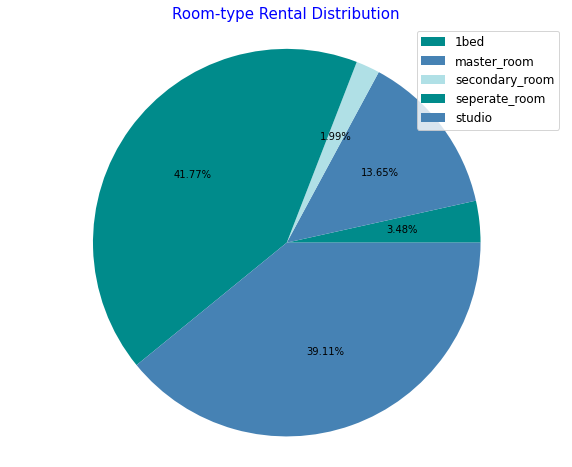

In [ ]:
# 1 - Pie chart
room_type = combined_csv.groupby('rental_method')['latitude'].count().reset_index()
room_type.rename(columns={'latitude':'n_rooms'},inplace=True)
plt.figure(figsize=(10,8))
plt.pie(room_type['n_rooms'],autopct='%1.2f%%', colors=['darkcyan', 'steelblue','powderblue'])
plt.axis('equal')
plt.legend(labels=room_type['rental_method'],loc='best',fontsize='12')
plt.title('Room-type Rental Distribution', fontsize='15',color='b')
plt.show()
plt.close()

# B.Differentiate prices among available room types.

ValueError: ignored

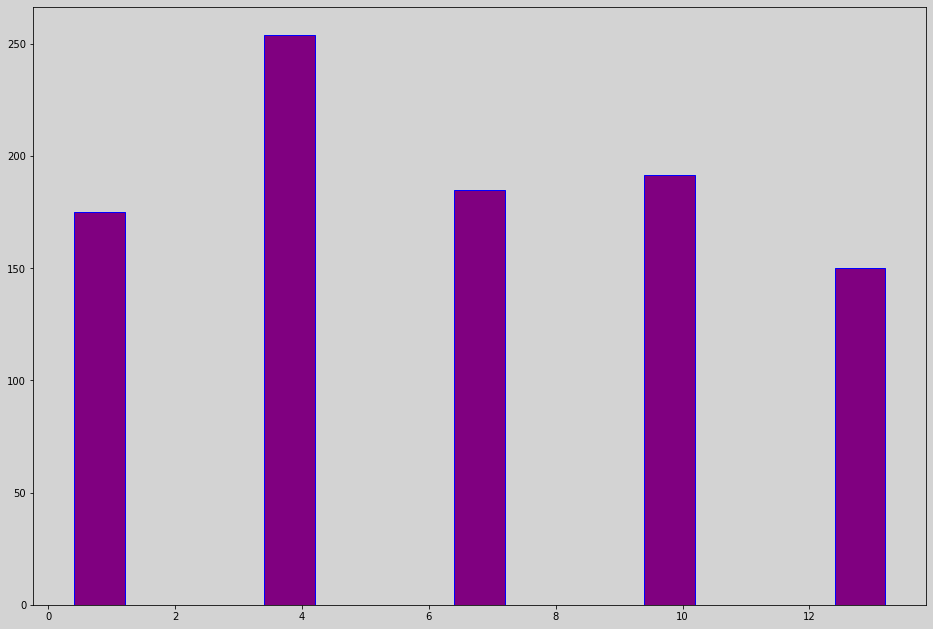

In [ ]:
# 2 - Bar plot with price to location distribution
loc_price = combined_csv.groupby(['state','rental_method'])['rental_price'].mean().reset_index()
locations = loc_price.state.unique()
x_rooms1 = [0.8, 3.8, 6.8, 9.8, 12.8]
x_rooms2 = [1.6, 4.6, 7.6, 10.6, 13.6]
x_rooms3 = [2.4, 5.4, 8.4, 11.4, 14.4]
x_rooms4 = [3.2, 6.2, 9.2, 12.2, 15.2]
x_rooms3 = [4.0, 7.0, 10.0, 13.0, 16.0]
y_values1 = loc_price[loc_price['rental_method'] == '1bed']['rental_price'].values
y_values2 = loc_price[loc_price['rental_method'] == 'master_room']['rental_price'].values
y_values3 = loc_price[loc_price['rental_method'] == 'secondary_room']['rental_price'].values
y_values4 = loc_price[loc_price['rental_method'] == 'seperate_room']['rental_price'].values
y_values5 = loc_price[loc_price['rental_method'] == 'studio']['rental_price'].values
fig3,ax2 = plt.subplots(figsize=(16,11))
fig3.patch.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
plt.bar(x_rooms1, y_values1, color='purple', edgecolor='b')
plt.bar(x_rooms2, y_values2, color='red', edgecolor='b')
plt.bar(x_rooms3, y_values3, color='yellowgreen', edgecolor='b')
plt.bar(x_rooms4, y_values4, color='green', edgecolor='b')
plt.bar(x_rooms5, y_values5, color='yellow', edgecolor='b')
ax2.set_xticks(range(1,16,3))
ax2.set_xticklabels(locations, fontsize='12')
for tick in ax2.get_xticklabels():
  tick.set_rotation(45)
plt.xlabel('Location/Room-type',fontsize='15')
plt.ylabel('Prices', fontsize='15')
plt.legend(labels=loc_price.room_type.unique(), loc='best')
plt.title('New York Price-Rental Distribution by Location and Room-type',fontsize='15')
plt.show()